In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [113]:
data = pd.read_csv("../Data/Airline_Dataset.csv")
data.head()

id  Gender      Customer Type  Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer   25  Business travel  Business   
2  110028  Female     Loyal Customer   26  Business travel  Business   
3   24026  Female     Loyal Customer   25  Business travel  Business   
4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                       3  ...                       5                 4   
1                       3  ...                       1                 1   
2                       2  ...                       5                 4   
3                       5  ...                       2                 2   
4                       3  ...                       3                 3   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0                 3                 4                4                 5   
1                 5                 3                1                 4   
2                 3                 4                4                 4   
3                 5                 3                1                 4   
4                 4                 4                3                 3   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0            5                          25                      18.0   
1            1                           1                       6.0   
2            5                           0                       0.0   
3            2                          11                       9.0   
4            3                           0                       0.0   

              Satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied  

[5 rows x 24 columns]

In [114]:
y= data['Satisfaction']
data = data.drop("Satisfaction", axis=1)


In [115]:
y.value_counts()

Satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

Observation des valeurs manquants

In [117]:
data.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

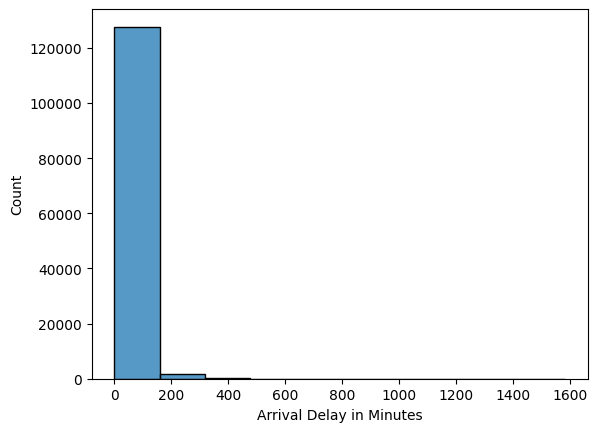

In [118]:
sns.histplot(data["Arrival Delay in Minutes"], bins= 10)

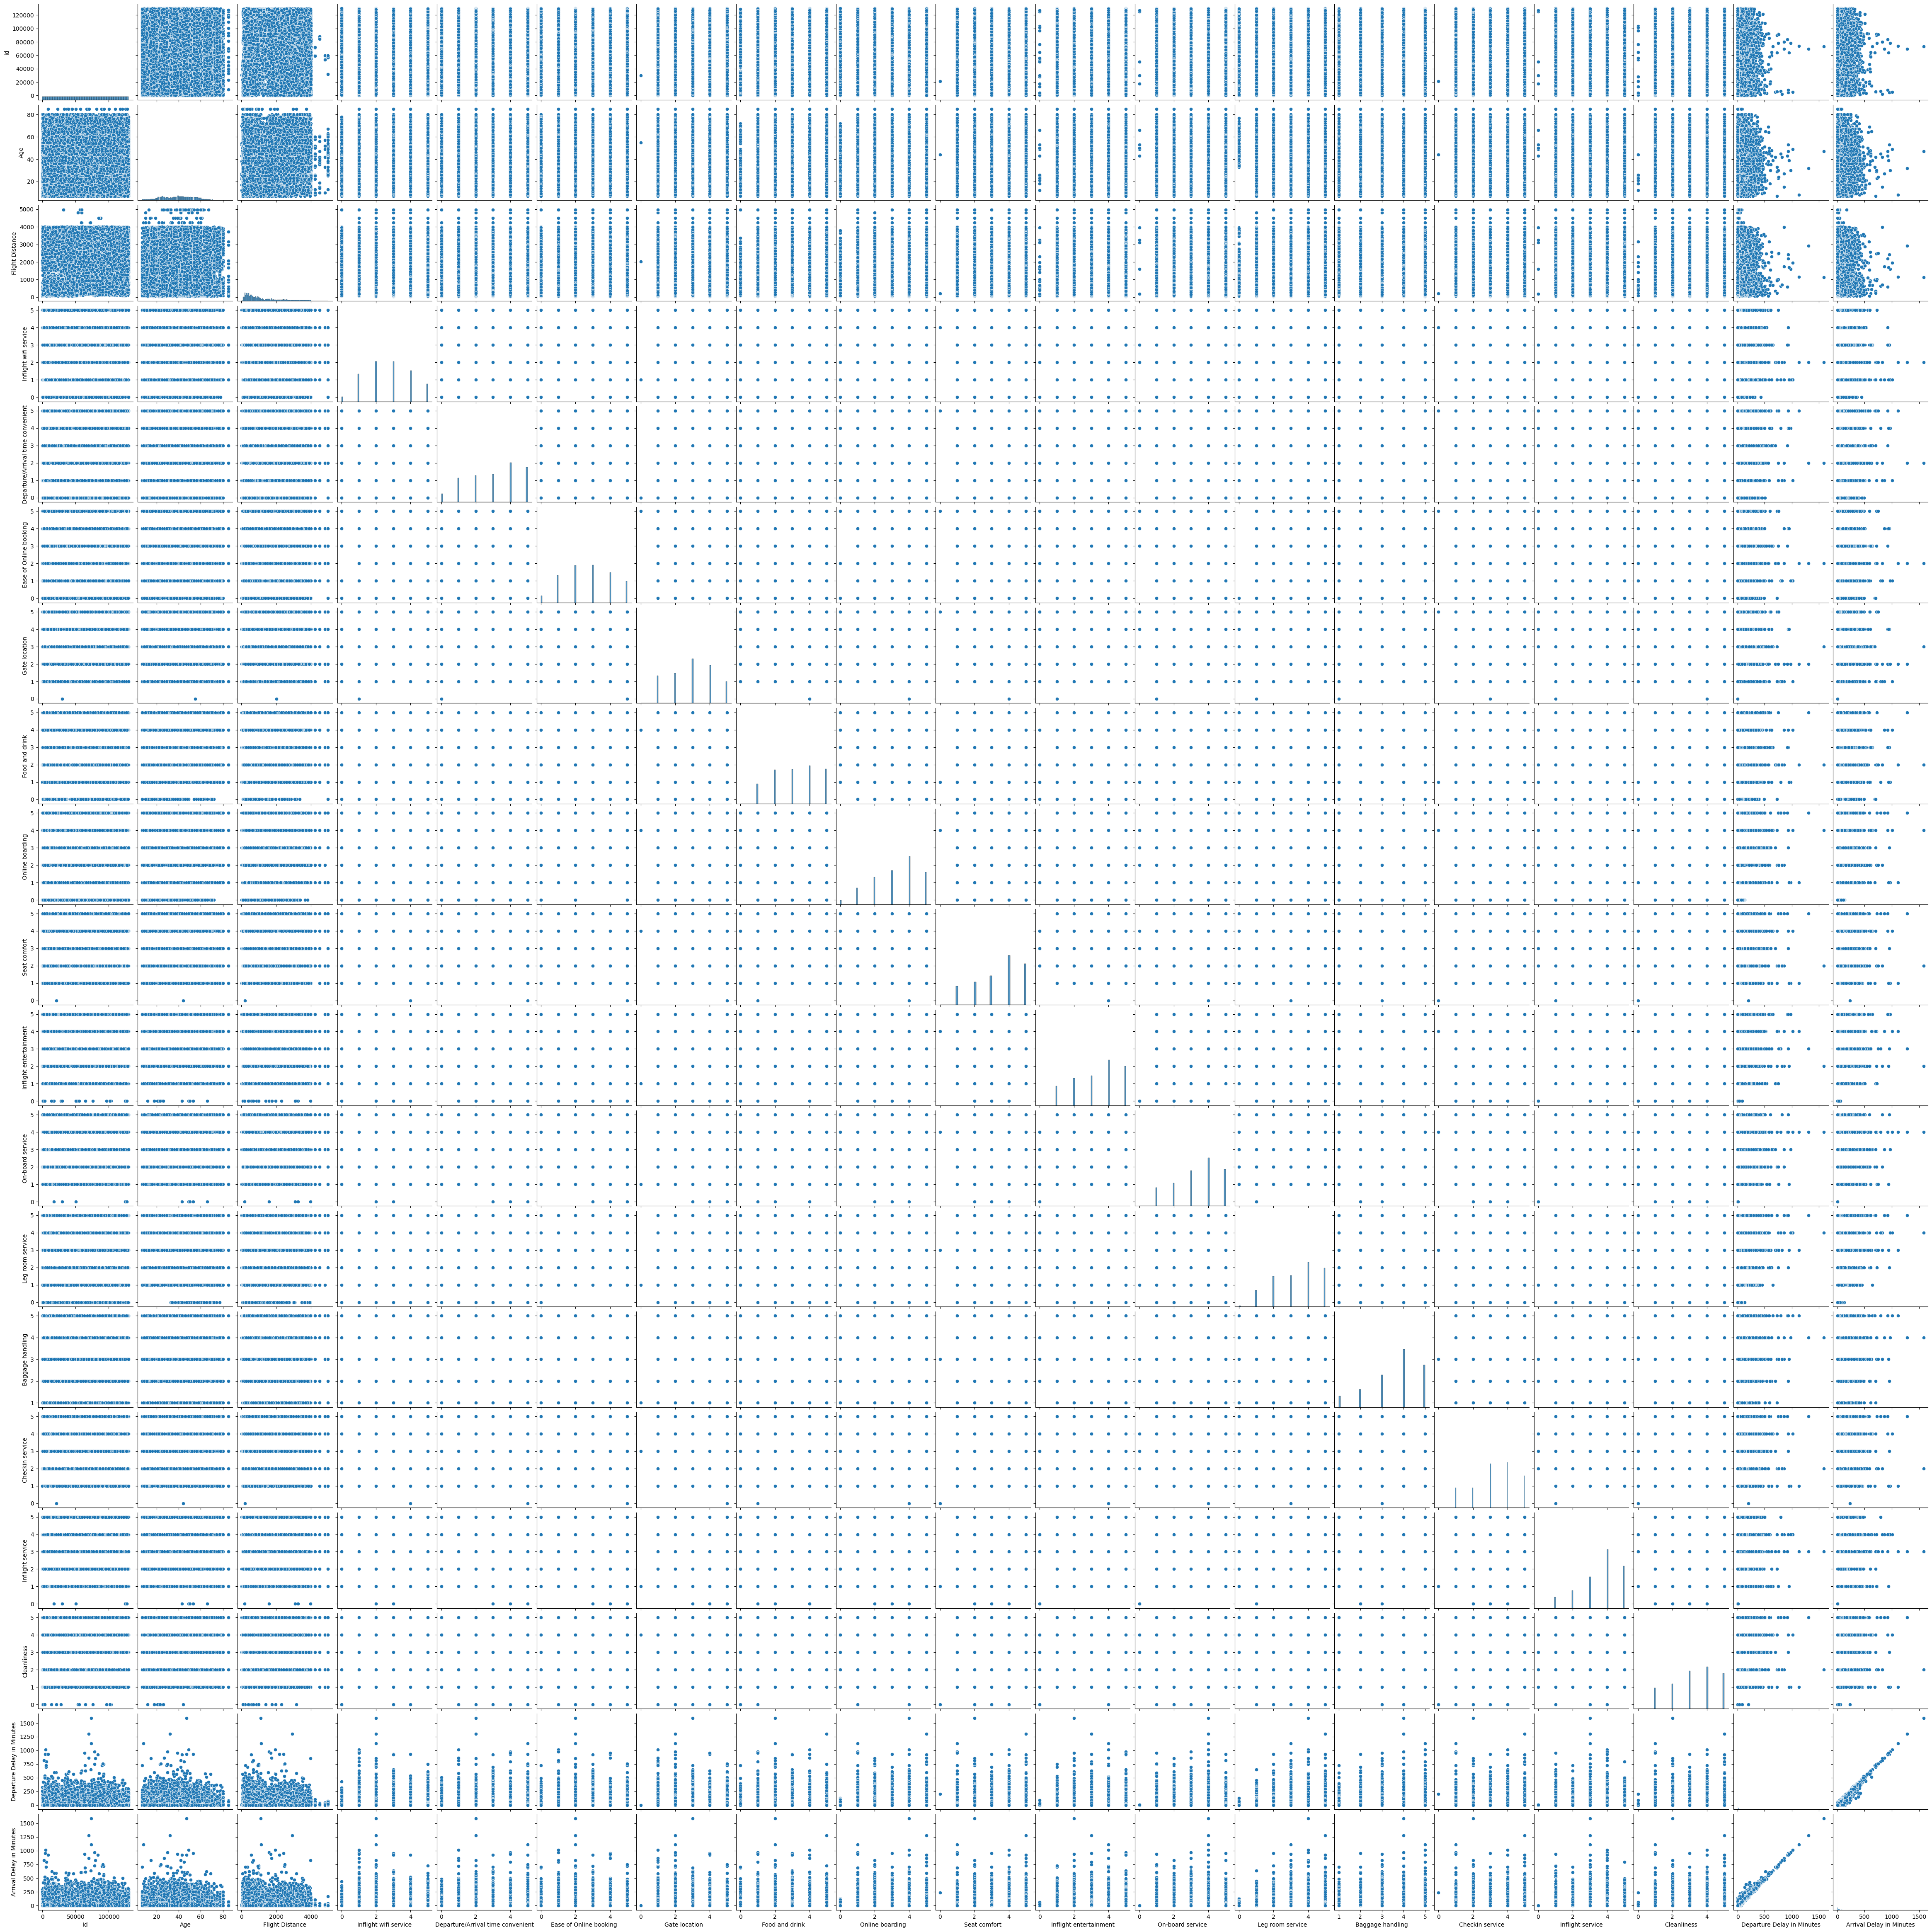

In [119]:
sns.pairplot(data, height= 2.5)
plt.show()

Imputation de valeur

In [120]:
from sklearn.impute import SimpleImputer
imputation = SimpleImputer(missing_values = np.nan, 
                           strategy = 'mean')

In [121]:
numeric_data = data.select_dtypes(include=[np.number])

In [122]:
imputed_data=imputation.fit_transform(numeric_data)
data[numeric_data.columns]=imputed_data

In [123]:
# confirmation s'il y a presence de valeurs nulls

data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [124]:
def plot_all_numerique(df):
    # Filtre les columns numeriques
    numeric_cols = df.select_dtypes(include='number').columns

    for col in numeric_cols:
        plt.figure(figsize=(14, 5))  # Taille des graphes

        # Histograme con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col} - Histogram')  # Títre específique
        plt.xlabel('')  # axis X vide
        plt.ylabel('')  # axis  Y vide

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Distribution of {col} - Boxplot')  # Títre específique
        plt.xlabel('')  # # axis X vide
        plt.ylabel('')  # # axis Y vide

        plt.suptitle(f'Distribution Analysis for {col}', fontsize=16)  # Títre general
        plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajuste l'espace du titre
        plt.show()

## Visualisation

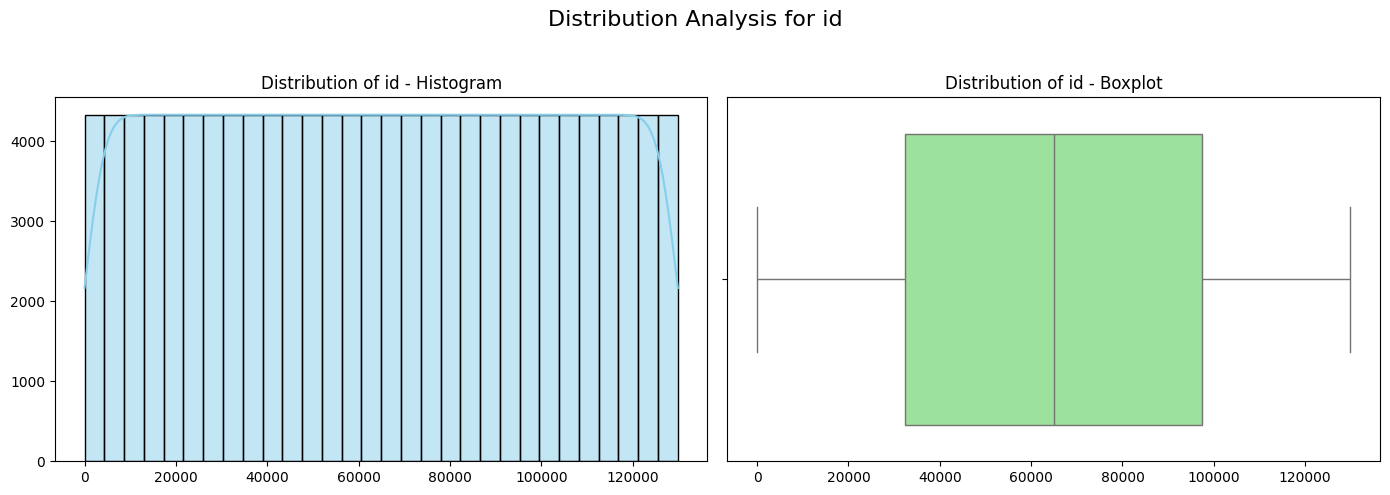

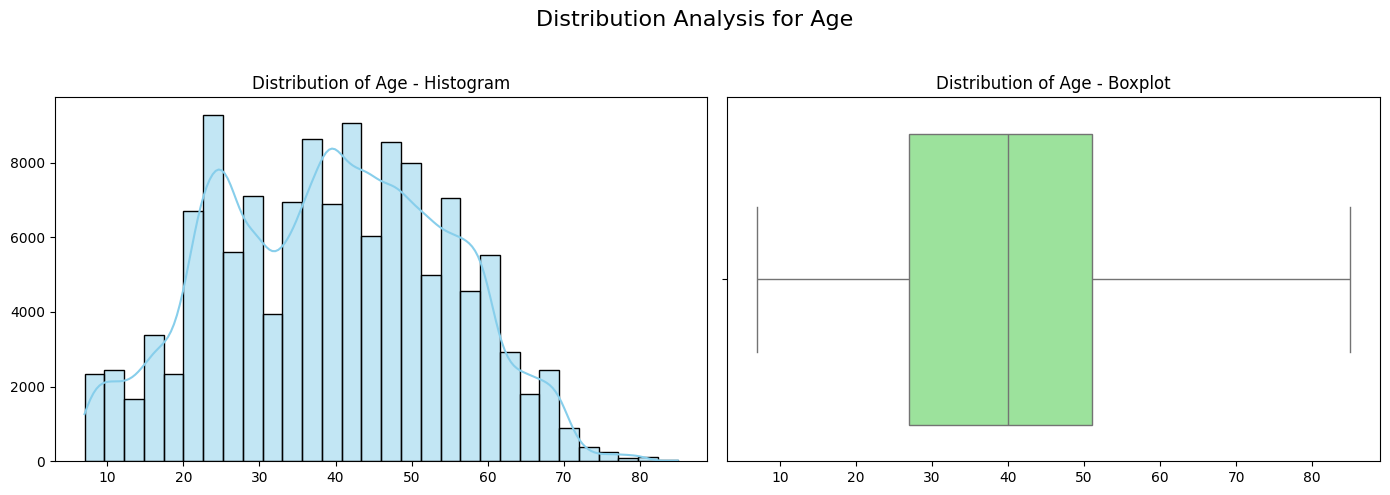

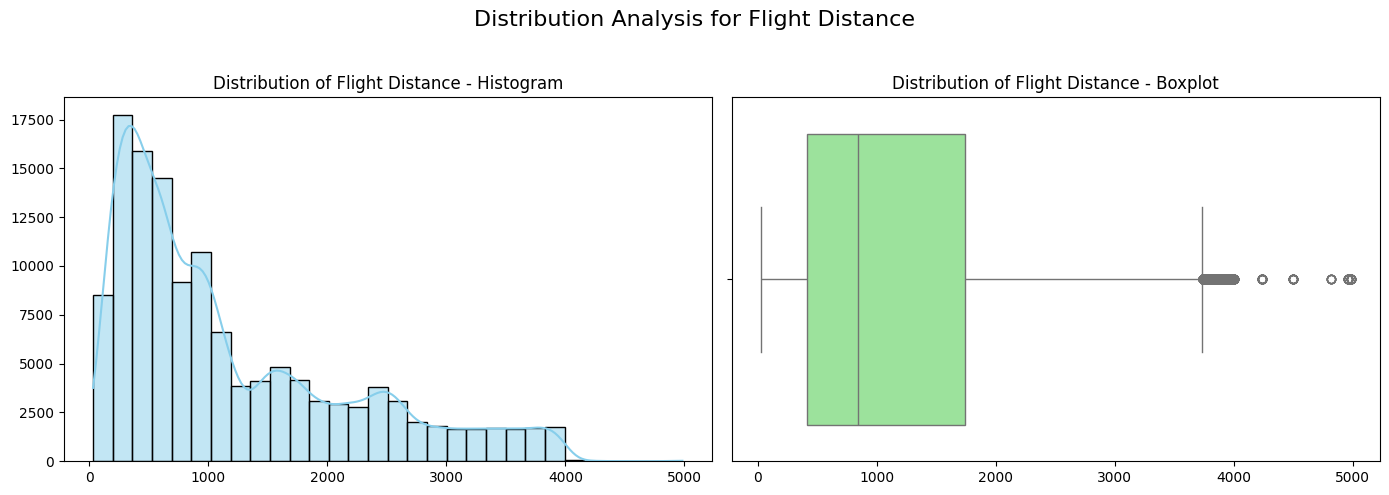

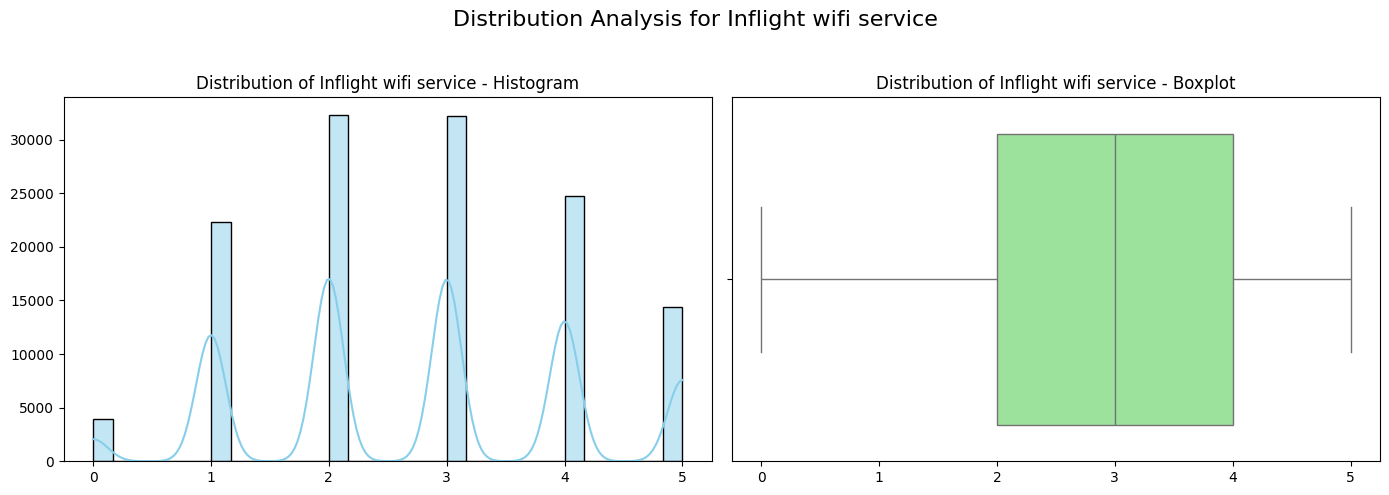

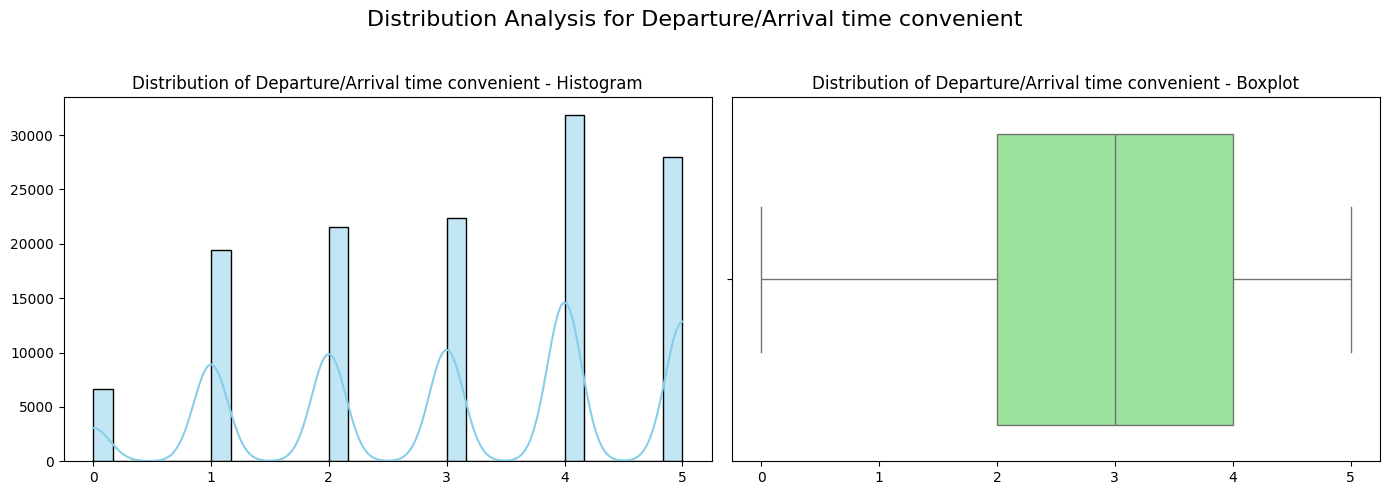

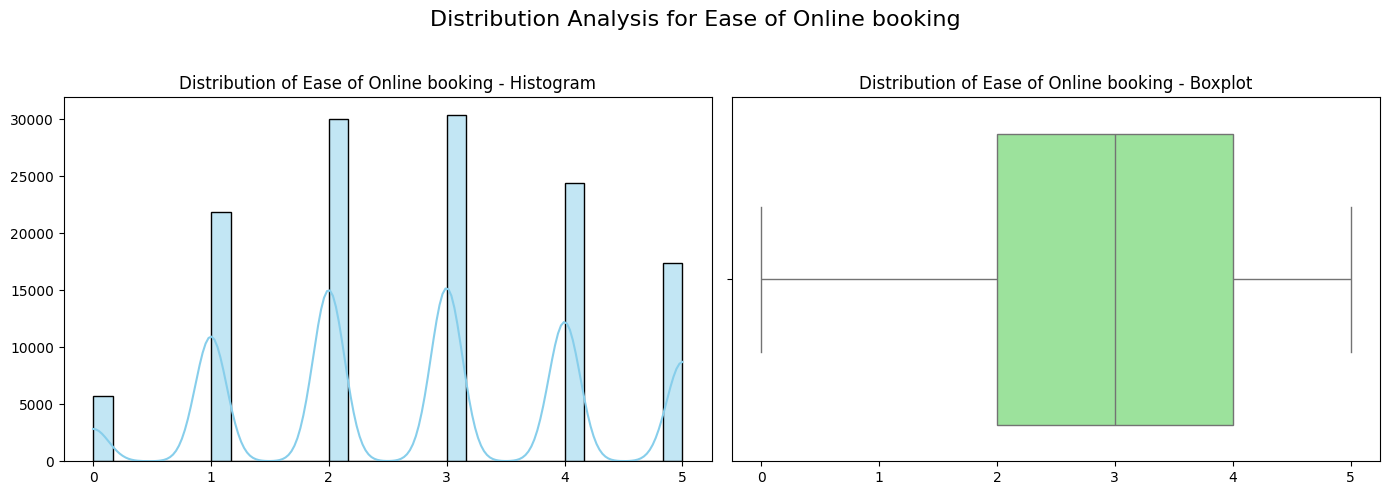

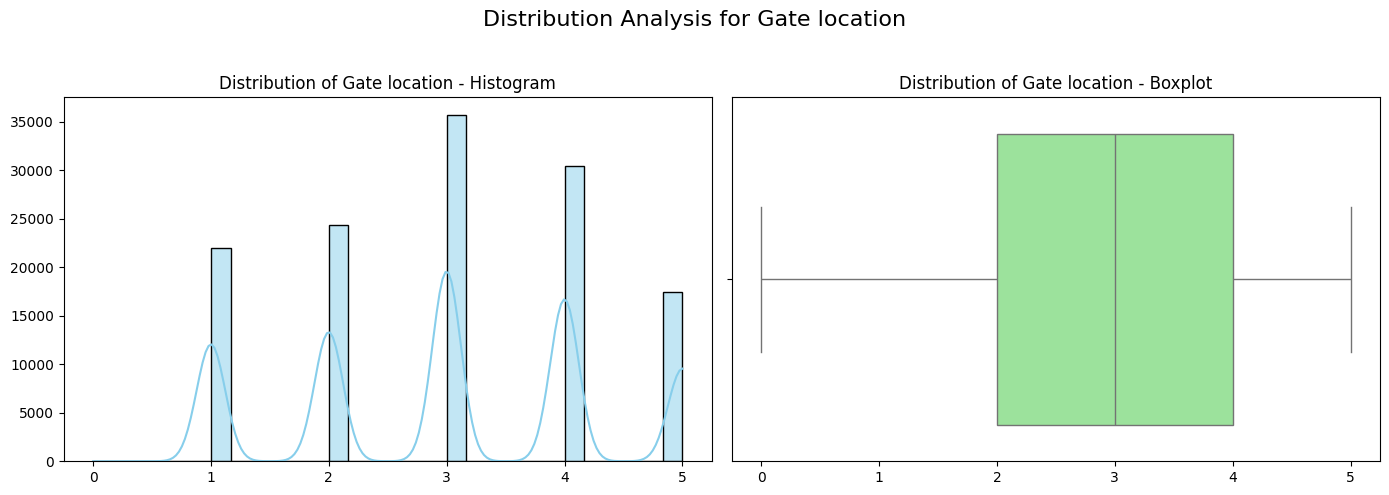

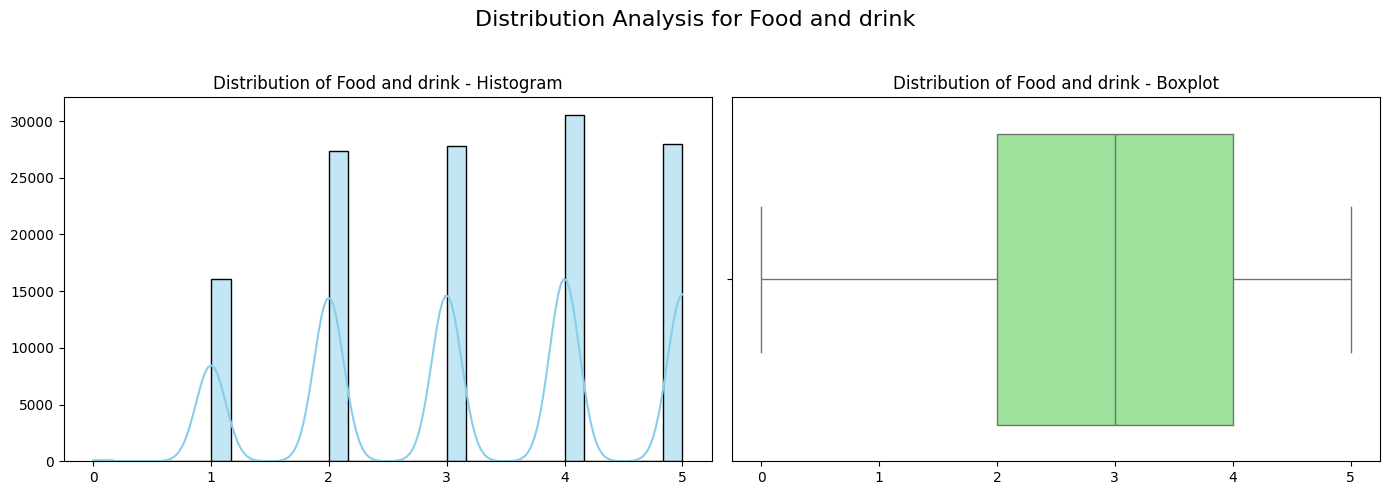

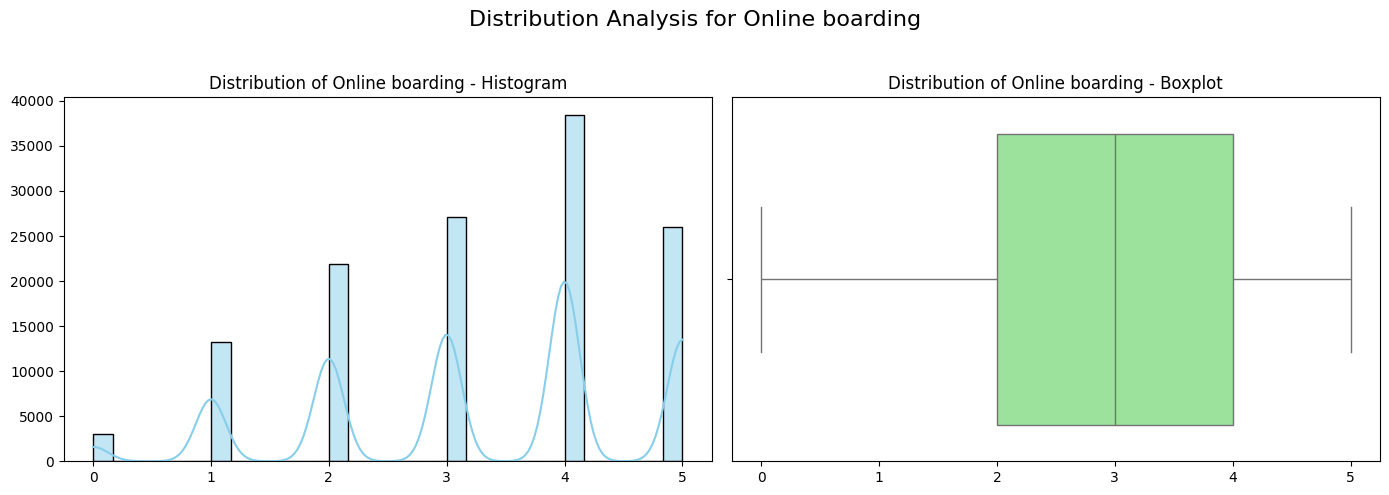

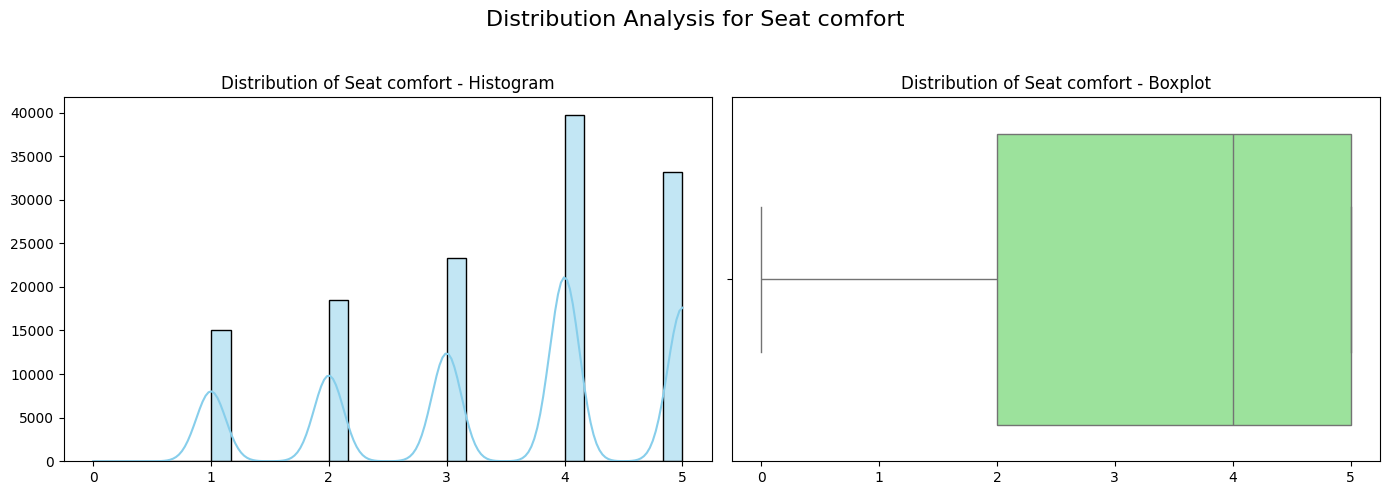

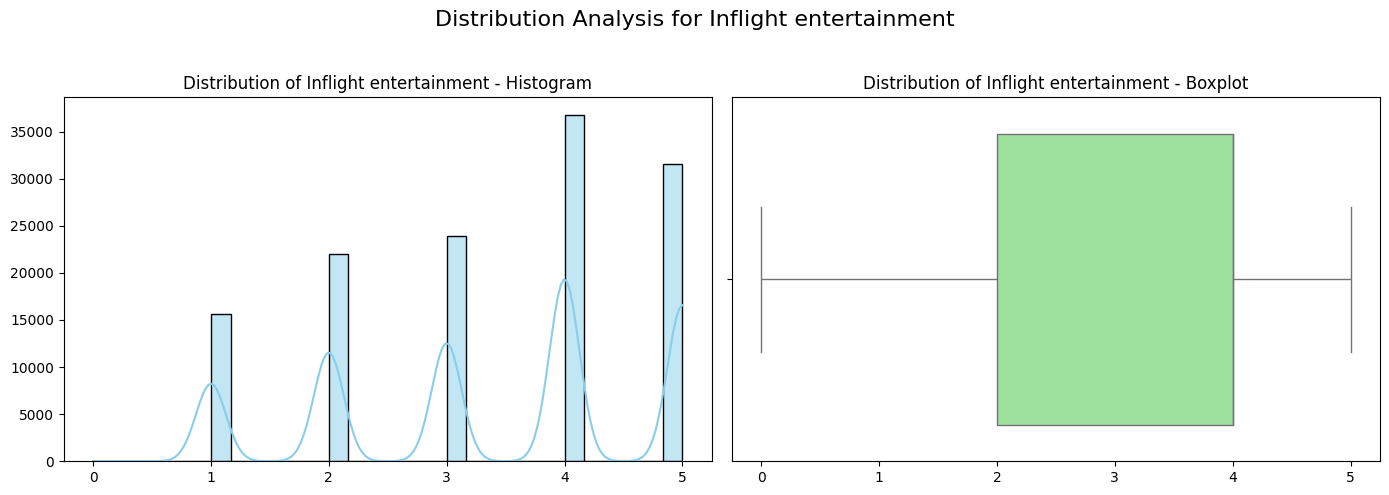

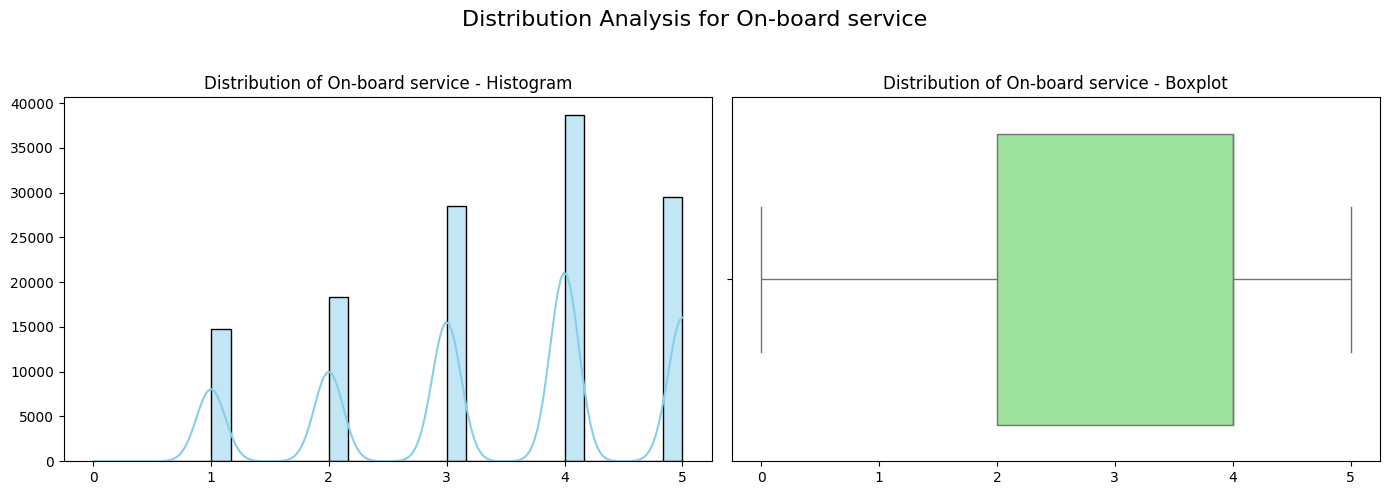

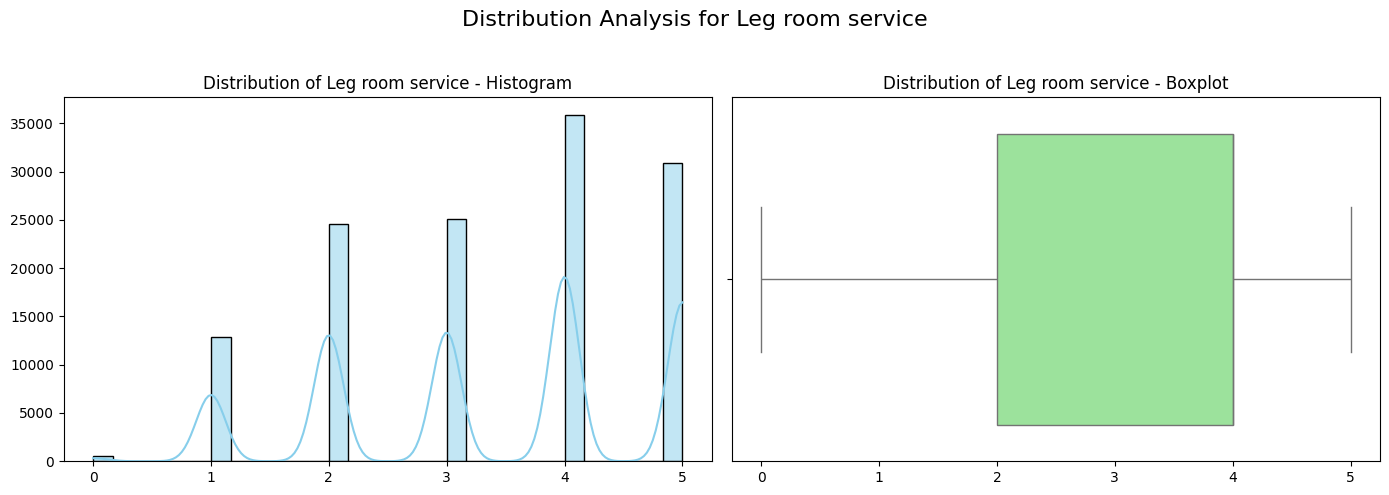

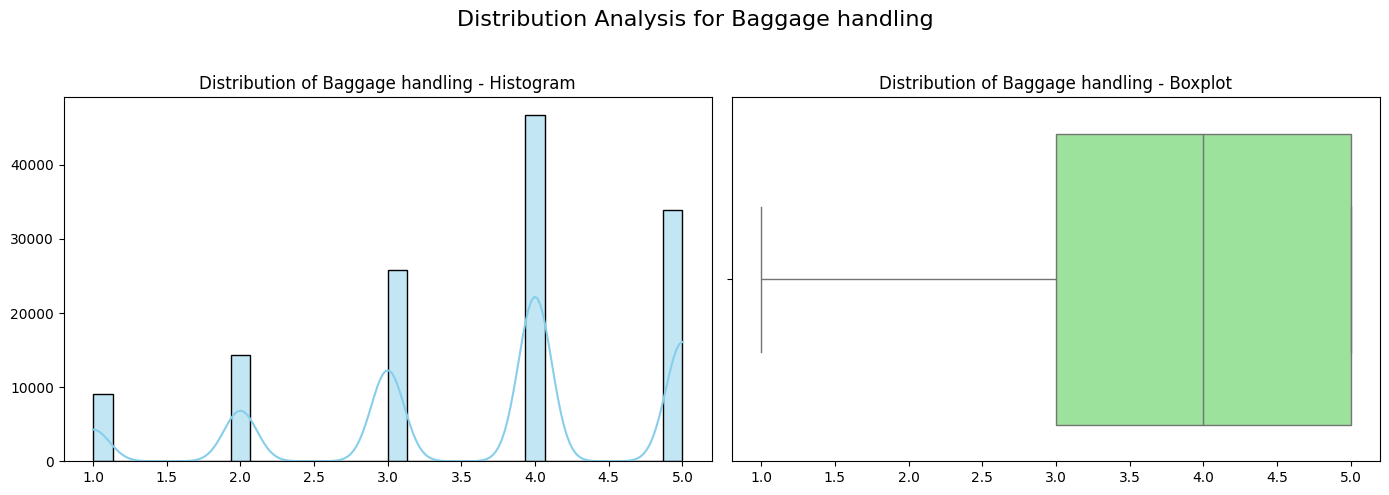

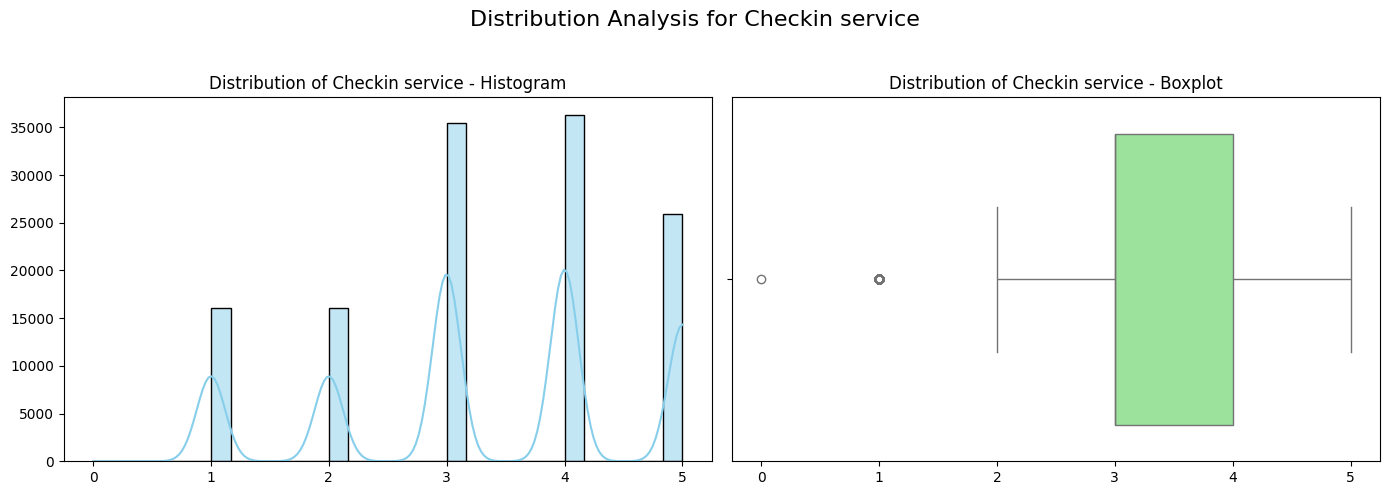

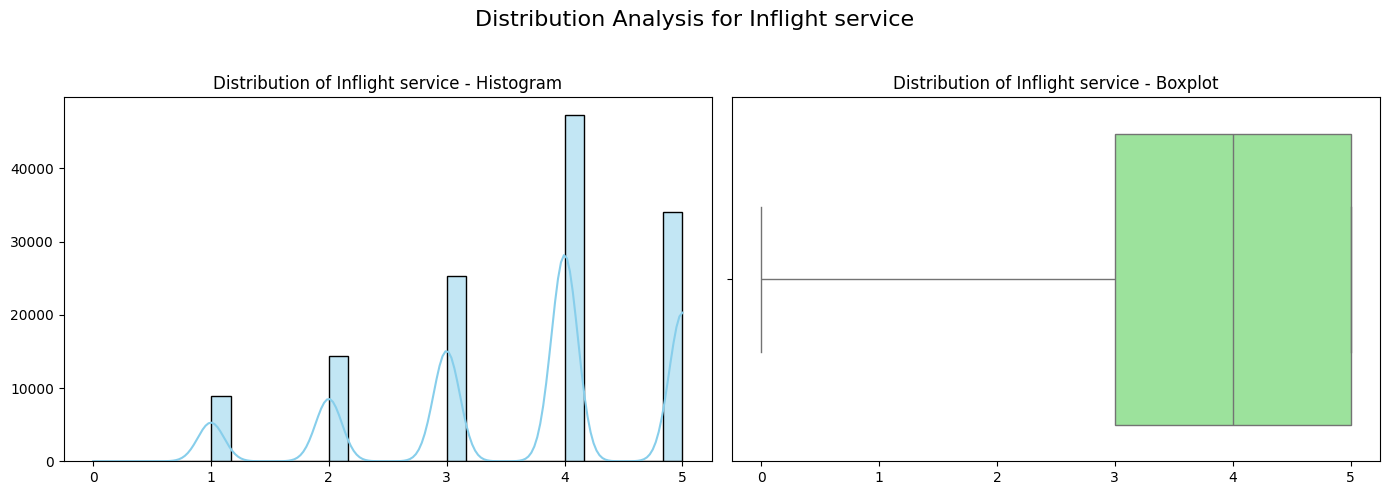

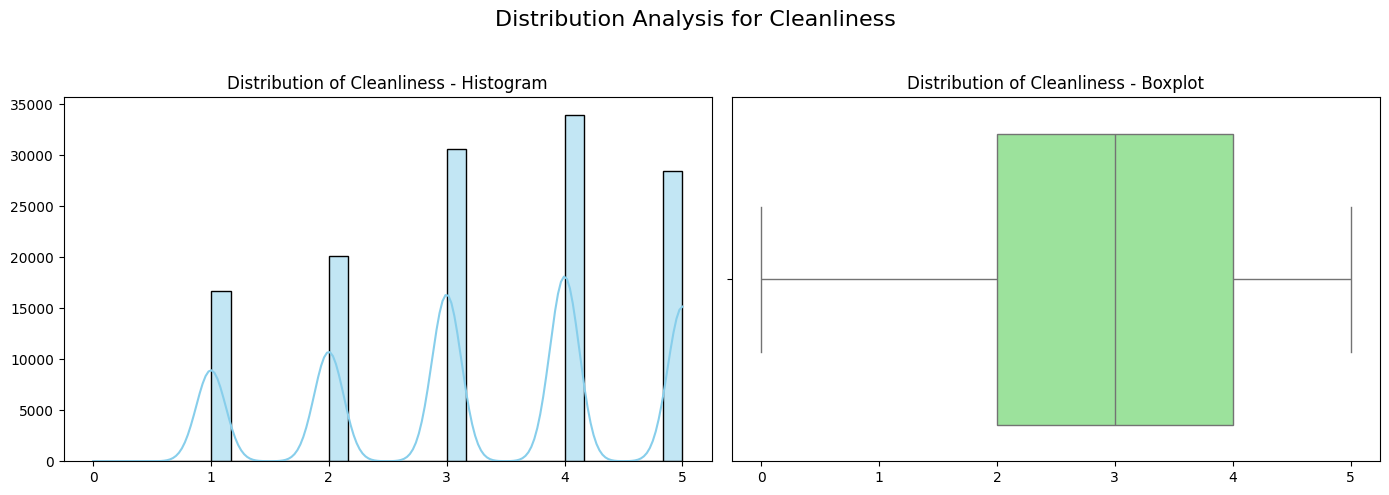

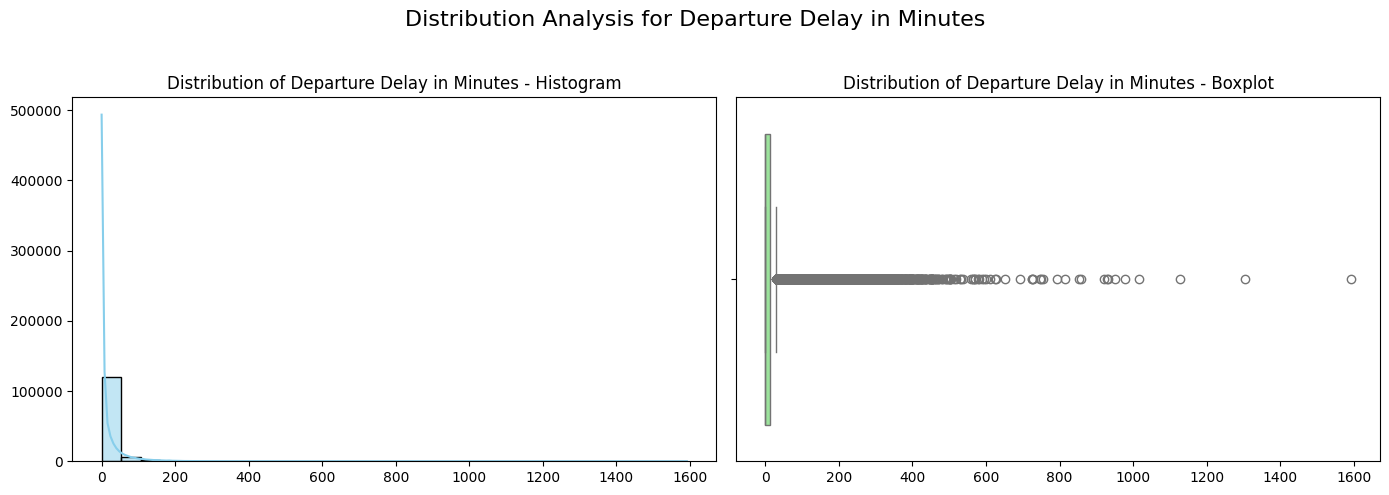

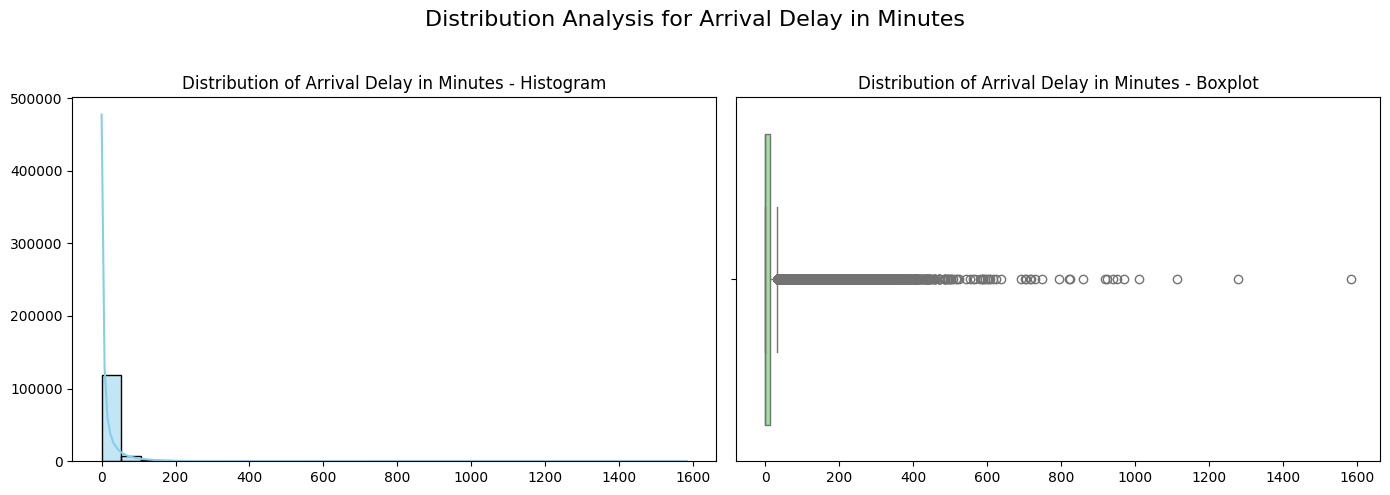

In [125]:
plot_all_numerique(data)

## encodage

In [126]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


In [127]:
data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [128]:
normalize_features_names= data[['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [129]:
rbscaler = RobustScaler()

rbscaler_data = rbscaler.fit_transform(normalize_features_names)

In [130]:
numeric_data.loc[:, :] = imputation.transform(numeric_data)

## Encoding 

In [131]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [132]:
numeric_not_data = data.select_dtypes(include=[np.object_])

In [133]:
# encoder 

label_encoder = LabelEncoder()
y =label_encoder.fit_transform(y)


In [134]:
y= pd.DataFrame(y)

In [136]:
one_hot = OneHotEncoder()
one_hot.fit(numeric_not_data)

OneHotEncoder()

In [137]:
encoded_features = one_hot.transform(numeric_not_data).toarray()
encoded_features

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]], shape=(129880, 9))

In [138]:
encoded_features_names = one_hot.get_feature_names_out()
encoded_features_names

array(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel',
       'Class_Business', 'Class_Eco', 'Class_Eco Plus'], dtype=object)

In [139]:
data_one_hot= pd.DataFrame(encoded_features,
            columns = encoded_features_names)

In [140]:
data_one_hot

Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0                 0.0          1.0                           1.0   
1                 0.0          1.0                           0.0   
2                 1.0          0.0                           1.0   
3                 1.0          0.0                           1.0   
4                 0.0          1.0                           1.0   
...               ...          ...                           ...   
129875            0.0          1.0                           0.0   
129876            0.0          1.0                           1.0   
129877            1.0          0.0                           1.0   
129878            0.0          1.0                           1.0   
129879            1.0          0.0                           1.0   

        Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                                   0.0                             0.0   
1                                   1.0                             1.0   
2                                   0.0                             1.0   
3                                   0.0                             1.0   
4                                   0.0                             1.0   
...                                 ...                             ...   
129875                              1.0                             1.0   
129876                              0.0                             1.0   
129877                              0.0                             0.0   
129878                              0.0                             1.0   
129879                              0.0                             0.0   

        Type of Travel_Personal Travel  Class_Business  Class_Eco  \
0                                  1.0             0.0        0.0   
1                                  0.0             1.0        0.0   
2                                  0.0             1.0        0.0   
3                                  0.0             1.0        0.0   
4                                  0.0             1.0        0.0   
...                                ...             ...        ...   
129875                             0.0             1.0        0.0   
129876                             0.0             1.0        0.0   
129877                             1.0             0.0        1.0   
129878                             0.0             1.0        0.0   
129879                             1.0             0.0        1.0   

        Class_Eco Plus  
0                  1.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
129875             0.0  
129876             0.0  
129877             0.0  
129878             0.0  
129879             0.0  

[129880 rows x 9 columns]

concatenation de dataframe

In [141]:
data_transforme= pd.concat([data_one_hot, numeric_data, y], axis=1)
data_transforme=data_transforme.rename(columns={0: 'Satisfaction'})


In [142]:
data_transforme.head(20)


Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
0             0.0          1.0                           1.0   
1             0.0          1.0                           0.0   
2             1.0          0.0                           1.0   
3             1.0          0.0                           1.0   
4             0.0          1.0                           1.0   
5             1.0          0.0                           1.0   
6             0.0          1.0                           1.0   
7             1.0          0.0                           1.0   
8             1.0          0.0                           1.0   
9             0.0          1.0                           0.0   
10            1.0          0.0                           0.0   
11            1.0          0.0                           1.0   
12            0.0          1.0                           1.0   
13            0.0          1.0                           1.0   
14            1.0          0.0                           1.0   
15            0.0          1.0                           0.0   
16            1.0          0.0                           1.0   
17            0.0          1.0                           1.0   
18            1.0          0.0                           1.0   
19            0.0          1.0                           1.0   

    Customer Type_disloyal Customer  Type of Travel_Business travel  \
0                               0.0                             0.0   
1                               1.0                             1.0   
2                               0.0                             1.0   
3                               0.0                             1.0   
4                               0.0                             1.0   
5                               0.0                             0.0   
6                               0.0                             0.0   
7                               0.0                             1.0   
8                               0.0                             1.0   
9                               1.0                             1.0   
10                              1.0                             1.0   
11                              0.0                             0.0   
12                              0.0                             1.0   
13                              0.0                             0.0   
14                              0.0                             0.0   
15                              1.0                             1.0   
16                              0.0                             1.0   
17                              0.0                             1.0   
18                              0.0                             1.0   
19                              0.0                             0.0   

    Type of Travel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  \
0                              1.0             0.0        0.0             1.0   
1                              0.0             1.0        0.0             0.0   
2                              0.0             1.0        0.0             0.0   
3                              0.0             1.0        0.0             0.0   
4                              0.0             1.0        0.0             0.0   
5                              1.0             0.0        1.0             0.0   
6                              1.0             0.0        1.0             0.0   
7                              0.0             1.0        0.0             0.0   
8                              0.0             1.0        0.0             0.0   
9                              0.0             0.0        1.0             0.0   
10                             0.0             0.0        1.0             0.0   
11                             1.0             0.0        0.0             1.0   
12                             0.0             0.0        1.0             0.0   
13                             1.

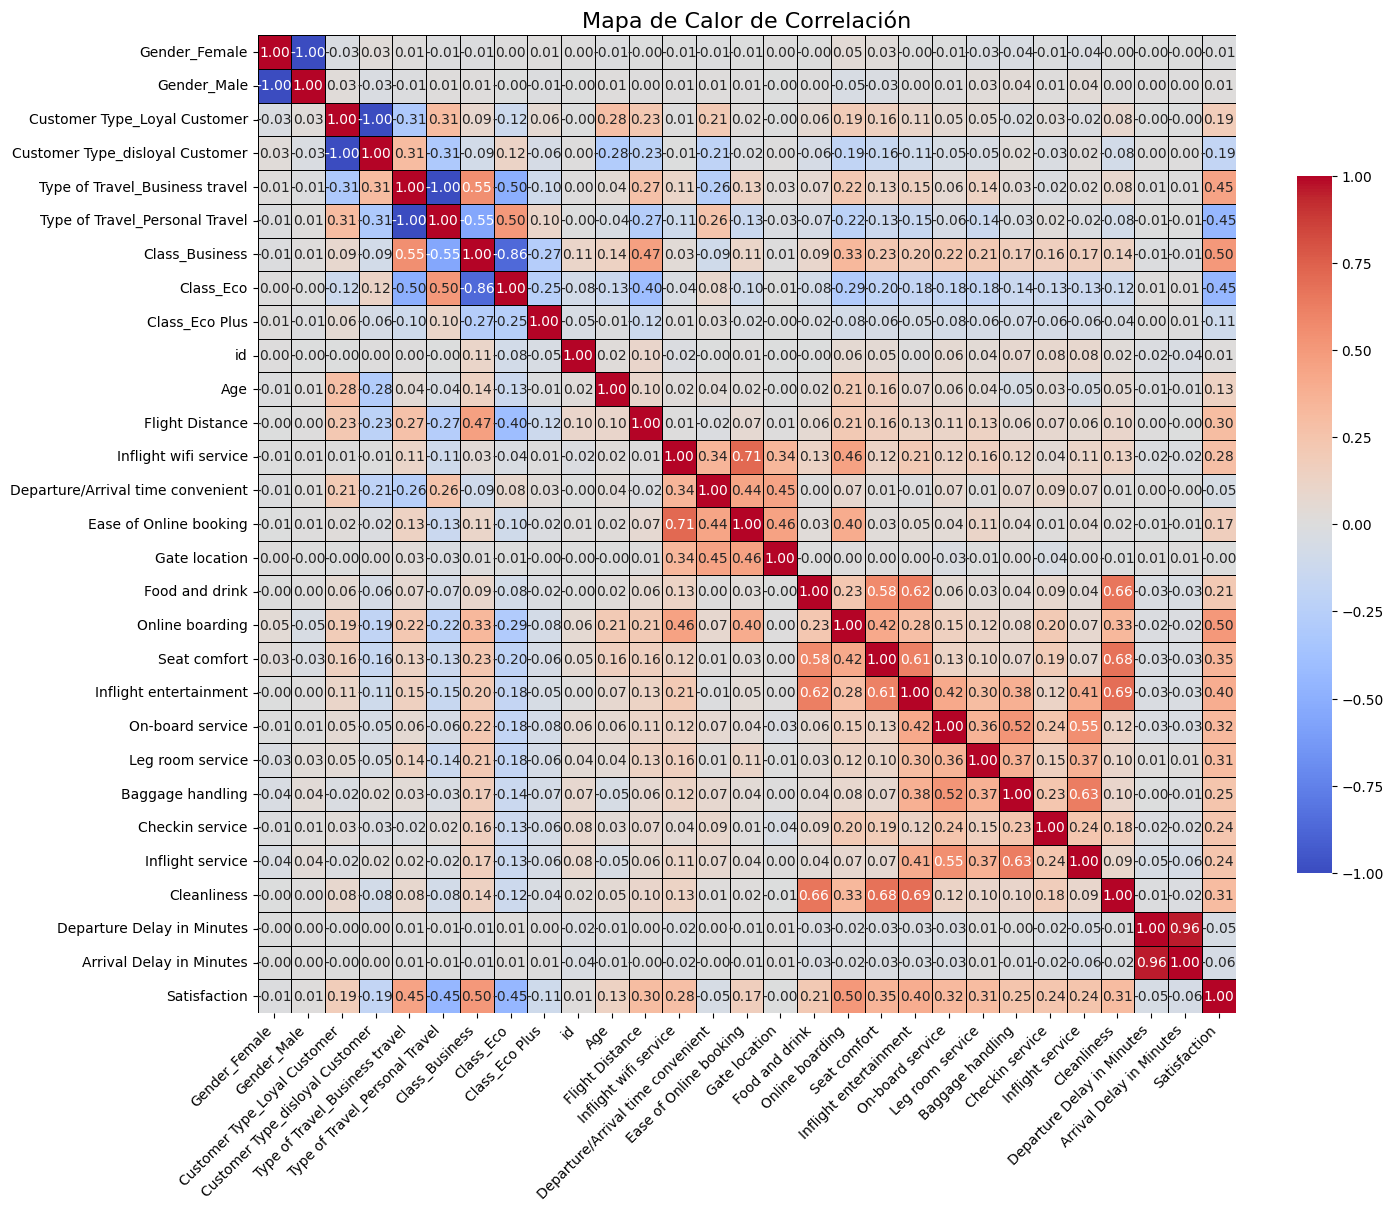

In [143]:
plt.figure(figsize=(15, 15))  # Ajustar el tamaño de la figura
sns.heatmap(data_transforme.corr(), 
             annot=True, 
             fmt=".2f",  # Formato de las anotaciones
             cmap='coolwarm',  # Cambiar el mapa de colores
             square=True,  # Hacer las celdas cuadradas
             cbar_kws={"shrink": .5},  # Ajustar el tamaño de la barra de color
             linewidths=.5,  # Añadir líneas entre las celdas
             linecolor='black')  # Color de las líneas
plt.title('Mapa de Calor de Correlación', fontsize=16)  # Título del gráfico
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x
plt.yticks(rotation=0)  # Rotar etiquetas del eje y
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [145]:
data_transforme.columns

Index(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer', 'Type of Travel_Business travel',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'id', 'Age', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction'],
      dtype='object')

In [144]:
# export data en csv 
data_transforme.to_csv('../data/clean_data.csv')